Data story to analyze if reminders given to save money increases savings.

In [1]:
import pandas as pd
import statistics
import plotly.express as px

Now let's visualize the data to see if we can find anything.

In [2]:
#Uploading the CSV
from google.colab import files 
data_to_load = files.upload()

Saving savings_data_final.csv to savings_data_final.csv


In [3]:
#Plotting the graph
df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df, y = "quant_saved", color = "rem_any")
fig.show()

This graph shows how much each person saved. According to the graph, the people who weren't reminded saved more. The yellow dots represent the people who were reminded to save, and the blue dots represent the people who weren't.

Let's find out how many people got reminders, and how many people didn't.

In [4]:
import csv
with open('savings_data_final.csv', newline = "") as f:
  reader = csv.reader(f)
  savingsdata = list(reader)
savingsdata.pop(0)
#Finding total number of people and the number of people who were reminded
tp = len(savingsdata)
tpgr = 0
for data in savingsdata:
  if int(data[3]) == 1:
    tpgr+=1
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = ["Reminded", "Not Reminded"], y = [tpgr, (tp-tpgr)]))
fig.show()

More people were reminded than not.

Let's calculate the mean, median, and mode of the savings made by the people.

In [5]:
allsavings = []
for i in savingsdata:
  allsavings.append(float(i[0]))
mean = statistics.mean(allsavings)
median = statistics.median(allsavings)
mode = statistics.mode(allsavings)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 85.32780331328739
Median: 39.2724
Mode: 0.0


Looking at these values, this is not a normal distribution.

Now let's calculate the mean, median, and mode for people who did and did not recieve reminders.

In [6]:
remindedsavings = []
notremindedsavings = []
for i in savingsdata:
  if int(i[3]) == 1:
    remindedsavings.append(float(i[0]))
  else:
    notremindedsavings.append(float(i[0]))
rsmean = statistics.mean(remindedsavings)
nrsmean = statistics.mean(notremindedsavings)
rsmedian = statistics.median(remindedsavings)
nrsmedian = statistics.median(notremindedsavings)
rsmode = statistics.mode(remindedsavings)
nrsmode = statistics.mode(notremindedsavings)
print("Reminded Savings:")
print("Mean:", rsmean)
print("Median", rsmedian)
print("Mode", rsmode)
print("")
print("Not Reminded Savings:")
print("Mean:", nrsmean)
print("Median", nrsmedian)
print("Mode", nrsmode)

Reminded Savings:
Mean: 82.56940908263547
Median 39.2724
Mode 0.0

Not Reminded Savings:
Mean: 89.67095185226523
Median 36.0475
Mode 0.0


There is a $7.10 difference between the Reminded Savings mean and the Not Reminded Savings mean, with the Not Reminded Savings mean being higher.

Let's calculate standard deviation for All Savings, Reminded Savings, and Not Reminded Savings

In [7]:
sta = statistics.stdev(allsavings)
strs = statistics.stdev(remindedsavings)
stnrs = statistics.stdev(notremindedsavings)
print("Standard Deviation of All Savings:", sta)
print("Standard Deviation of the Reminded Savings:", strs)
print("Standard Deviation of the Not Reminded Savings:", stnrs)

Standard Deviation of All Savings: 196.75453011909315
Standard Deviation of the Reminded Savings: 173.24866414440817
Standard Deviation of the Not Reminded Savings: 228.875050299707


The Not Reminded Savings has the higher standard deviation, meaning they have saved the most

Conclusion: Giving people reminders to save isn't an effective way to get them to save money.

Now let's find out the correlation between the age of the people and the savings made by them.* 

*The columns that have an age of 0 will not be considered since their age is missing.

In [8]:
import numpy as np
age = []
savings = []
for i in savingsdata:
  if float(i[5]) != 0:
    age.append(float(i[5]))
    savings.append(float(i[0]))
correlation = np.corrcoef(age, savings)
print("Correlation between age of participants and their savings:", correlation[0,1])

Correlation between age of participants and their savings: 0.03663447975985462


The correlation shows that the savings are not dependant on age.

In [9]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df['quant_saved'].tolist()], ["Savings"], show_hist = False)
fig.show()

This graph is not normally distributed because most of the values are below 1,000. In a normal distribution, most of the data is concentrated in the center. But here, most of the data is concentrated on the left side. To deal with this situation, we can remove the outliers and find the Interquartile Range.

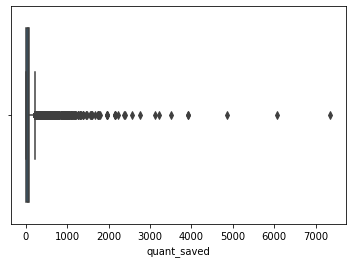

In [10]:
#Code to find the outliers
import seaborn as sns
sns.boxplot(data = df, x = df["quant_saved"])

We can see that the majority of the data is represented by a thick, long black line. We also have a thin, long, black line that seperates the data that we should use for our analysis. And finally, we have a horizontal line that repreents the rest of the data.

In [11]:
#Code to remove the outliers
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
IQR = q3 - q1
print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", IQR)
lowerwhisker = q1 - 1.5*IQR
upperwhisker = q3 + 1.5*IQR
print("Lower Whisker:", lowerwhisker)
print("Upper Whisker:", upperwhisker)
newdf = df[df["quant_saved"] < upperwhisker]

Q1: 2.2840000000000003
Q3: 86.514
Interquartile Range: 84.22999999999999
Lower Whisker: -124.06099999999998
Upper Whisker: 212.85899999999998


From here, we can see that anyone who saved more than $213 is an outlier. We will remove those values and create a new dataset. Now, let's calculate the mean, median, and mode of this new dataset.

In [13]:
allsavings = newdf["quant_saved"].tolist()
mean = statistics.mean(allsavings)
median = statistics.median(allsavings)
mode = statistics.mode(allsavings)
standarddeviation = statistics.stdev(allsavings)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", standarddeviation)
fig = ff.create_distplot([newdf["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

Mean: 46.200519389818794
Median: 36.0475
Mode: 0.0
Standard Deviation: 50.866871917288634


The mean and median are a little similar, and the standard deviation has reduced significantly. But we still do not have a normal distribution. To make this a normal dstribution, we can simply select random samples from this.

In [14]:
#Collecting 1,000 of 100 data points each and saving their mean in a list
import random
samplingmeanlist = []
for i in range(1000):
  temporarylist = []
  for j in range(100):
    temporarylist.append(random.choice(allsavings))
  samplingmeanlist.append(statistics.mean(temporarylist))
samplingmean = statistics.mean(samplingmeanlist)
fig = ff.create_distplot([samplingmeanlist], ["Sampling Savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [samplingmean, samplingmean], y = [0,0.1], mode = "lines", name = "Mean"))
fig.show()

We got a bell curve for the sampling data. Now let's calculate the standard deviation of this sampling distribution.

In [15]:
standarddeviation = statistics.stdev(samplingmeanlist)
print("Standard Deviation:", standarddeviation)

Standard Deviation: 5.077774537132147


Let's compare the mean of the population and sampling distribution.

In [16]:
print("Mean of Population:", statistics.mean(allsavings))
print("Mean of Sampling:", samplingmean)

Mean of Population: 46.200519389818794
Mean of Sampling: 46.10823558370128


They come out almost the same. Now, as a final check, let's calculate the correlation between the age and savings for the new data, from which the outliers were removed.

In [17]:
tempdf = newdf[newdf.age != 0]
age = tempdf["age"].tolist()
savings = tempdf["quant_saved"].tolist()
correlation = np.corrcoef(age, savings)
print("Correlation:", correlation[0,1])

Correlation: 0.08561544120342093


The correlation is even less this time. So, they are still not correlated. Now, let's look into the real question, which is whether reminding people to save actually works. With ZTest, we will take a sample from people who are given reminders, and see if that fits the population of people who were not given reminders. If they both fit well, we can conclude that the reminders had no significant effect.

First, let's filter out data of people who were given a reminder and those who were not given a reminder.

In [18]:
remindeddf = newdf.loc[newdf["rem_any"] == 1]
notremindeddf = newdf.loc[newdf["rem_any"] == 0]
print(remindeddf.head())
print(notremindeddf.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


Let's plot a distribution graph for this and see whether it's a normal distribution or not.

In [19]:
fig = ff.create_distplot([notremindeddf["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

This does not follow normal distribution, so we will take sampling data, plot it, then use it for our ZTest.

In [24]:
notremindedsavings = notremindeddf["quant_saved"].tolist()
notremindedsampling = []
for i in range(1000):
  templist = []
  for i in range(100):
    templist.append(random.choice(notremindedsavings))
    notremindedsampling.append(statistics.mean(templist))
meansamplingofnotremindedlist = statistics.mean(notremindedsampling)
standarddeviationofnotremindedlist = statistics.stdev(notremindedsampling)
print("Mean:", meansamplingofnotremindedlist)
print("Standard Deviation:", standarddeviationofnotremindedlist)
fig = ff.create_distplot([notremindedsampling], ["Savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [samplingmean, samplingmean], y = [0, 0.1], mode = "lines", name = "Mean"))
fig.show()

Mean: 43.72170277715535
Standard Deviation: 11.482032141094212


Now we have a resemblance of a normal distribution. Let's calculate the first, second, and third standard deviation for this.

In [25]:
fsds = meansamplingofnotremindedlist - standarddeviationofnotremindedlist
fsde = meansamplingofnotremindedlist + standarddeviationofnotremindedlist
ssds = meansamplingofnotremindedlist - (2*standarddeviationofnotremindedlist)
ssde = meansamplingofnotremindedlist + (2*standarddeviationofnotremindedlist)
tsds = meansamplingofnotremindedlist - (3*standarddeviationofnotremindedlist)
tsde = meansamplingofnotremindedlist + (3*standarddeviationofnotremindedlist)
print("First Standard Deviation Start:", fsds)
print("First Standard Deviation End:", fsde)
print("Second Standard Deviation Start:", ssds)
print("Second Standard Deviation End:", ssde)
print("Third Standard Deviation Start:", tsds)
print("Third Standard Deviation End:", tsde)

First Standard Deviation Start: 32.239670636061135
First Standard Deviation End: 55.203734918249566
Second Standard Deviation Start: 20.757638494966926
Second Standard Deviation End: 66.68576705934377
Third Standard Deviation Start: 9.27560635387271
Third Standard Deviation End: 78.167799200438


Now let's calculate for people who have gotten reminders.

In [26]:
remindedsavings = remindeddf["quant_saved"].tolist()
remindedsampling = []
for i in range(1000):
  templist = []
  for i in range(100):
    templist.append(random.choice(remindedsavings))
    remindedsampling.append(statistics.mean(templist))
meansamplingofremindedlist = statistics.mean(remindedsampling)
standarddeviationofremindedlist = statistics.stdev(remindedsampling)
print("Mean:", meansamplingofremindedlist)
print("Standard Deviation:", standarddeviationofremindedlist)
fig = ff.create_distplot([remindedsampling], ["Savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [samplingmean, samplingmean], y = [0, 0.1], mode = "lines", name = "Mean"))
fig.show()

Mean: 48.5984218847463
Standard Deviation: 11.74956876887495


In [27]:
fsds = meansamplingofremindedlist - standarddeviationofremindedlist
fsde = meansamplingofremindedlist + standarddeviationofremindedlist
ssds = meansamplingofremindedlist - (2*standarddeviationofremindedlist)
ssde = meansamplingofremindedlist + (2*standarddeviationofremindedlist)
tsds = meansamplingofremindedlist - (3*standarddeviationofremindedlist)
tsde = meansamplingofremindedlist + (3*standarddeviationofremindedlist)
print("First Standard Deviation Start:", fsds)
print("First Standard Deviation End:", fsde)
print("Second Standard Deviation Start:", ssds)
print("Second Standard Deviation End:", ssde)
print("Third Standard Deviation Start:", tsds)
print("Third Standard Deviation End:", tsde)

First Standard Deviation Start: 36.84885311587135
First Standard Deviation End: 60.34799065362125
Second Standard Deviation Start: 25.099284346996402
Second Standard Deviation End: 72.0975594224962
Third Standard Deviation Start: 13.349715578121454
Third Standard Deviation End: 83.84712819137116


Let's see how significantly the reminders impacted the savings.

In [28]:
ZScore = (meansamplingofremindedlist - meansamplingofnotremindedlist)/standarddeviationofnotremindedlist
print("ZScore:", ZScore)

ZScore: 0.4247261327667918


#Conclusion
Even after removing the outliers, we see that reminders have not made a significant impact on people to make them save money.